# Top Factors That Contribute To Heart Diseases

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
uci_heart_data = pd.read_csv('heart_disease_uci.csv')

In [3]:
uci_heart_data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
uci_heart_data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

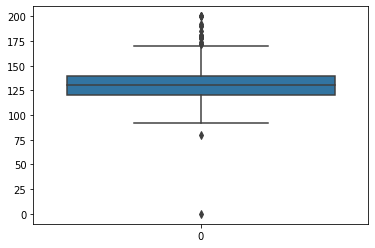

In [5]:
sns.boxplot(data=uci_heart_data['trestbps'])

In [6]:
# Use the median to fill in the na values since the data is skewed
uci_heart_data['trestbps'].fillna(uci_heart_data['trestbps'].median(), inplace=True)

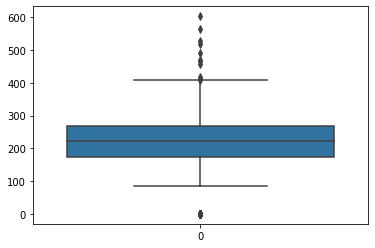

In [7]:
sns.boxplot(data=uci_heart_data['chol'])

In [8]:
# Use the median to fill in na values since the data is skewed
uci_heart_data['chol'].fillna(uci_heart_data['chol'].median(), inplace=True)

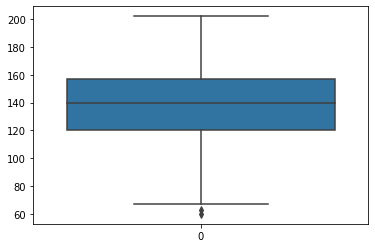

In [9]:
sns.boxplot(data=uci_heart_data['thalch'])

In [10]:
# Use the mean to fill in na values since the data is not skewed
uci_heart_data['thalch'].fillna(uci_heart_data['thalch'].mean(), inplace=True)

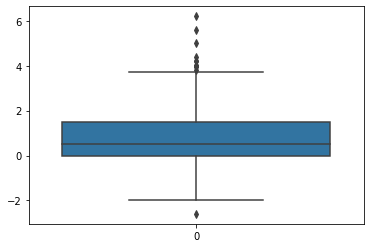

In [11]:
sns.boxplot(data=uci_heart_data['oldpeak'])

In [12]:
# Use the median to fill in na values since the data is skewed
uci_heart_data['oldpeak'].fillna(uci_heart_data['oldpeak'].median(), inplace=True)

In [13]:
# Forward Fill The FBS
uci_heart_data['fbs'].ffill(axis=0, inplace=True)

In [14]:
uci_heart_data['restecg'].ffill(axis=0, inplace=True)

In [15]:
# Forward Fill The exang
uci_heart_data['exang'].ffill(axis=0, inplace=True)

In [16]:
# Forward Fill The Slope
uci_heart_data['slope'].ffill(axis=0, inplace=True)

In [17]:
# Forward Fill The thal
uci_heart_data['thal'].ffill(axis=0, inplace=True)

In [18]:
# Forward Fill The ca
uci_heart_data['ca'].ffill(axis=0, inplace=True)

In [19]:
uci_heart_data.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

## Univariate Analysis

### a. Visualize the distribution of the age

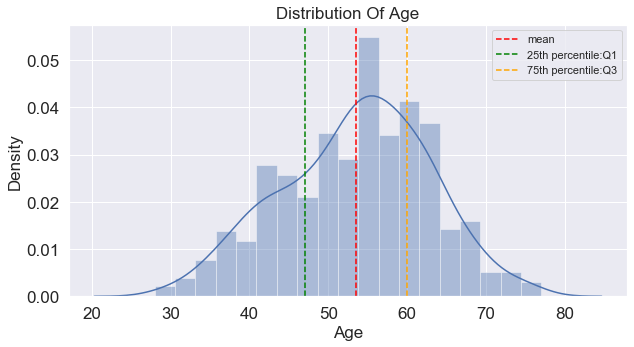

In [20]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.distplot(uci_heart_data['age'])
plt.title('Distribution Of Age', fontsize=17)
plt.axvline(x=np.mean(uci_heart_data['age']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(uci_heart_data['age'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(uci_heart_data['age'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.xlabel('Age', fontsize=17)
plt.ylabel('Density', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.legend()
plt.show()

### The data is normally distributed, with the mean lying around 55 years. 

### b. Visualize the distribution of the resting blood pressure

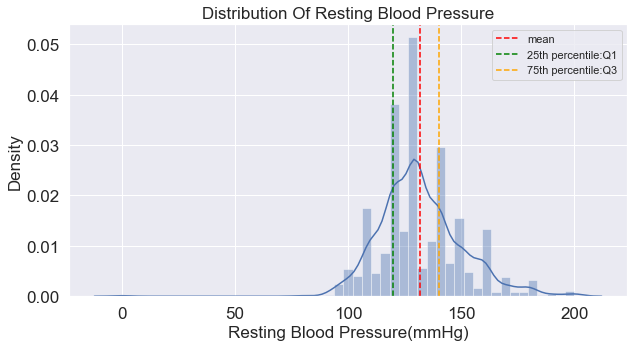

In [21]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.distplot(uci_heart_data['trestbps'])
plt.title('Distribution Of Resting Blood Pressure', fontsize=17)
plt.axvline(x=np.mean(uci_heart_data['trestbps']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(uci_heart_data['trestbps'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(uci_heart_data['trestbps'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.xlabel('Resting Blood Pressure(mmHg)', fontsize=17)
plt.ylabel('Density', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.legend()
plt.show()

### The data seems to be skewed at the left. The mean is around 130mmHg and that is the resting blood pressure of most patients. No patients have a blood pressure ranging from 0-80 and this is why the data is skewed to the right. 

### c. Visualize the distribution of Serum Cholesterol of patients

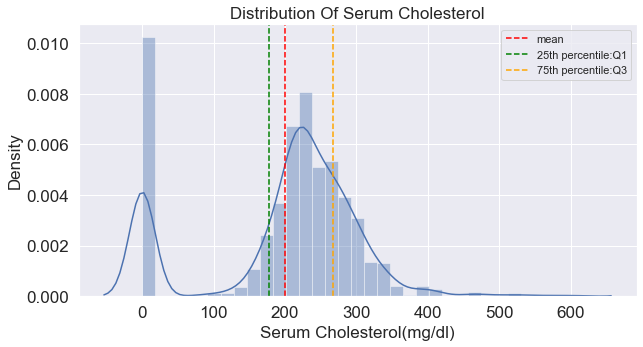

In [22]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.distplot(uci_heart_data['chol'])
plt.title('Distribution Of Serum Cholesterol', fontsize=17)
plt.axvline(x=np.mean(uci_heart_data['chol']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(uci_heart_data['chol'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(uci_heart_data['chol'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.xlabel('Serum Cholesterol(mg/dl)', fontsize=17)
plt.ylabel('Density', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.legend()
plt.show()

### The data is not normally distributed, and it is skewed to the right. The mean cholesterol is 200mg/dl. 

### d. Visualize the distribution of the maximum heart rate achieved. 

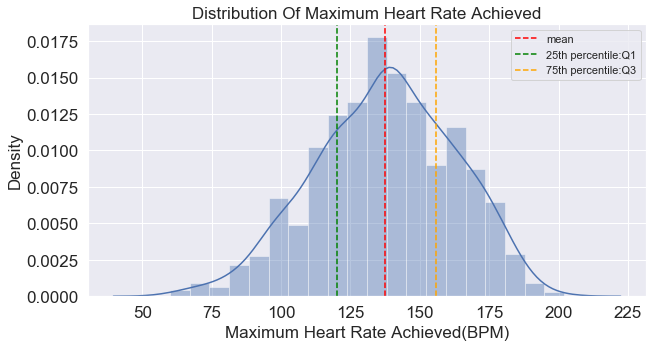

In [23]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.distplot(uci_heart_data['thalch'])
plt.title('Distribution Of Maximum Heart Rate Achieved', fontsize=17)
plt.axvline(x=np.mean(uci_heart_data['thalch']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(uci_heart_data['thalch'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(uci_heart_data['thalch'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.xlabel('Maximum Heart Rate Achieved(BPM)', fontsize=17)
plt.ylabel('Density', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.legend()
plt.show()

### The data is normally distributed with mean lying at around 135 Beats Per Minute(BPM). 

### e. Visualize the distribution of the ST depression

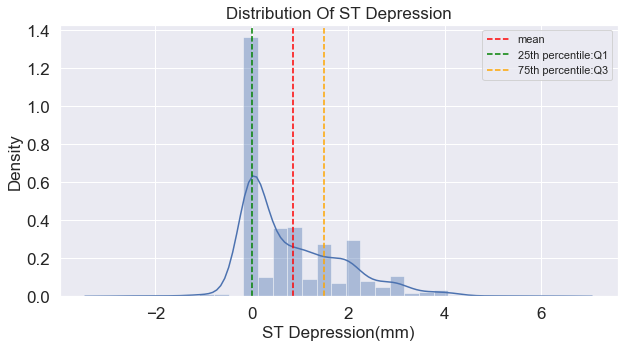

In [24]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.distplot(uci_heart_data['oldpeak'])
plt.title('Distribution Of ST Depression', fontsize=17)
plt.axvline(x=np.mean(uci_heart_data['oldpeak']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(uci_heart_data['oldpeak'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(uci_heart_data['oldpeak'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.xlabel('ST Depression(mm)', fontsize=17)
plt.ylabel('Density', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.legend()
plt.show()

### The data is skewed to the right with an ST depression mean of about 1mm. Most patients however, have an ST depression of 0mm. 

### f. Visualize the number of Male patients and Female Patients

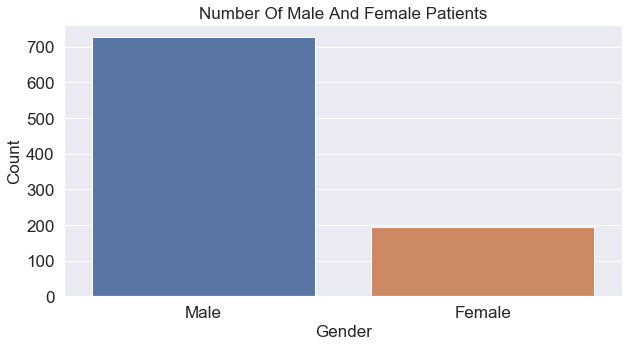

In [25]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.countplot(uci_heart_data['sex'])
plt.title('Number Of Male And Female Patients', fontsize=17)
plt.xlabel('Gender', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### Male patients are more as they are over 700 compared to Female Patients which are just 200. 

### g. Visualize the chest pain that is most common.

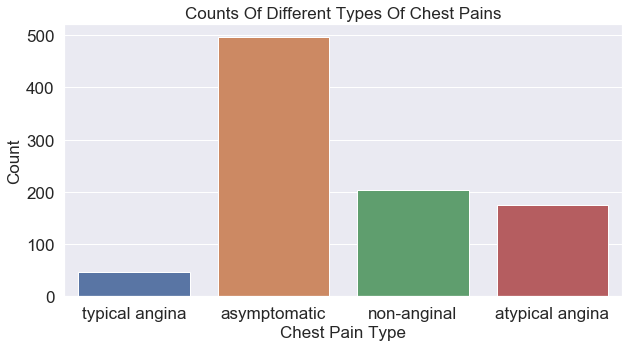

In [26]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.countplot(uci_heart_data['cp'])
plt.title('Counts Of Different Types Of Chest Pains', fontsize=17)
plt.xlabel('Chest Pain Type', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### Asymptomatic Chest Pain is more common as it has 500 cases while typical angina Chest Pain is less common as it has about 30 cases. 

### h. Visualize the resting electrocardiographic results

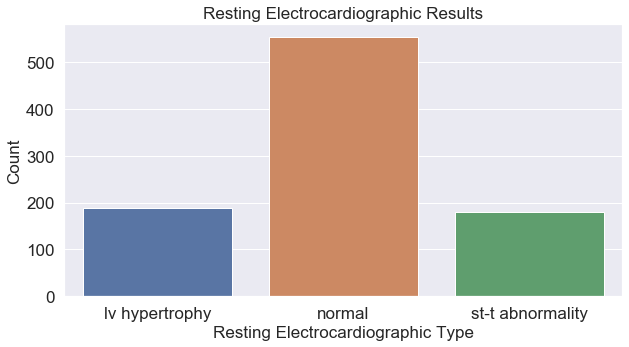

In [27]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.countplot(uci_heart_data['restecg'])
plt.title('Resting Electrocardiographic Results', fontsize=17)
plt.xlabel('Resting Electrocardiographic Type', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### It seems like the Normal Resting Electrocardiographic is more common as it has over 500 results. Patients with an Iv Hypertrophy Resting Electrocardiographic are similar to those with a ST-T Abnormality Resting Electrocardiographic as both categories are around 190.

### i. Discover the number of patients that suffer from exercise-induced angina vs those who don't.

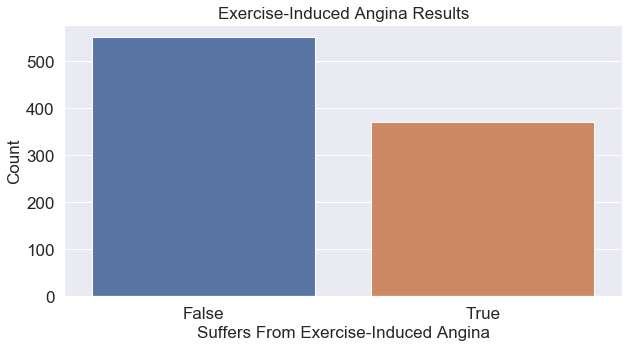

In [28]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.countplot(uci_heart_data['exang'])
plt.title('Exercise-Induced Angina Results', fontsize=17)
plt.xlabel('Suffers From Exercise-Induced Angina', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### Most patients do not suffer from exercise induced angina with over 500 reporting False and about 350 reporting True.

### j. Visualize the number of vessels colored by flouroscopy

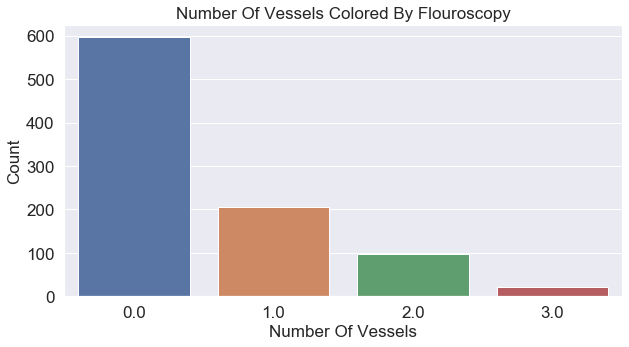

In [56]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.countplot(uci_heart_data['ca'])
plt.title('Number Of Vessels Colored By Flouroscopy', fontsize=17)
plt.xlabel('Number Of Vessels', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### Most patients have 0 vessels colored by Fluoroscopy as 600 were recorded. Very few patients have only 3 vessels colored by fluoroscopy, as about 20 were recorded.

### k. Visualize the defects of the heart in patients

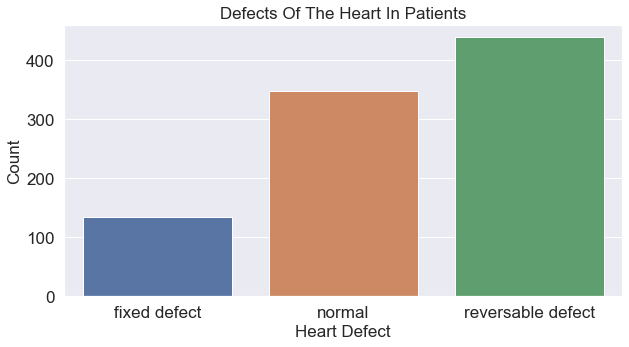

In [30]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.countplot(uci_heart_data['thal'])
plt.title('Defects Of The Heart In Patients', fontsize=17)
plt.xlabel('Heart Defect', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### Most patients have a reversible heart defect with over 400 being recorded. Over 300 patients have a normal heart. Only over 100 patients have a heart defect that is fixed.

## Bi-variate Analysis

### a. In the Univariate Analysis, we saw that the age is normally distributed, with a mean of around 55 years. Now it is time to figure out if this age group is the one that usually suffers from serious heart conditions or not.¶

In [31]:
age_bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
positive_heart = uci_heart_data[uci_heart_data['num'] > 0]
positive_heart['age_bins'] = pd.cut(positive_heart['age'], bins=age_bins)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
positive_heart

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,age_bins
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,"(65, 70]"
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,"(65, 70]"
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3,"(60, 65]"
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2,"(60, 65]"
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1,"(50, 55]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,914,62,Male,VA Long Beach,asymptomatic,158.0,170.0,False,st-t abnormality,138.0,True,0.0,flat,0.0,normal,1,"(60, 65]"
914,915,46,Male,VA Long Beach,asymptomatic,134.0,310.0,False,normal,126.0,False,0.0,flat,0.0,normal,2,"(45, 50]"
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,flat,0.0,normal,1,"(50, 55]"
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,flat,0.0,fixed defect,2,"(50, 55]"


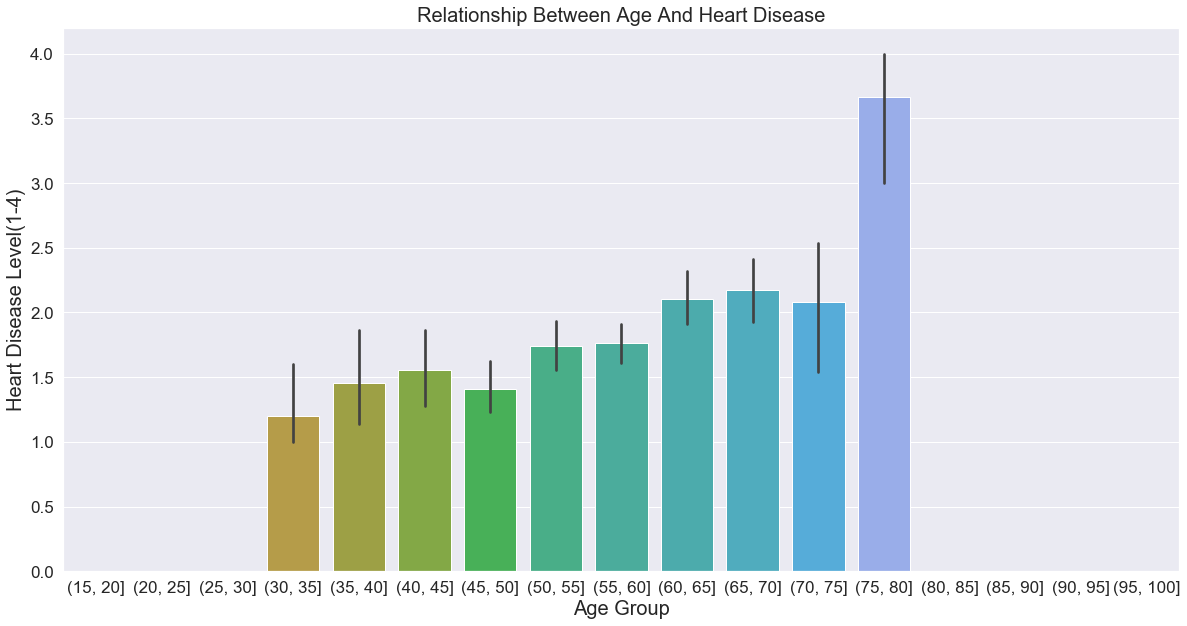

In [33]:
plt.figure(figsize=(20,10))
sns.set(style='darkgrid')
sns.barplot(data=positive_heart, x='age_bins', y='num')
plt.title('Relationship Between Age And Heart Disease', fontsize=20)
plt.xlabel('Age Group', fontsize=20)
plt.ylabel('Heart Disease Level(1-4)', fontsize=20)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### It turns out that even though many people around the age of 55 suffer from heart disease, the conditions are not that serious, as the level is about 1.6 on a scale of 1-4. The distribution plot shows that people above the age of 75 rarely suffer from heart disease, however the bar chart shows that they are the ones who usually have serious heart conditions as the level is about 3.6 on a scale of 1 - 4.

### b. In the Uni-Variate Analysis, we saw that the data of the Resting Blood Pressure is skewed to the left, with the mean lying around 130mmHg. Now it is time to see whether this level of resting blood pressure contributes to serious heart condition or not. 

In [34]:
resting_bins = [100, 109, 119, 129, 139, 149, 159, 169, 179, 189, 200]
positive_heart['resting_bins'] = pd.cut(positive_heart['trestbps'], bins=resting_bins)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


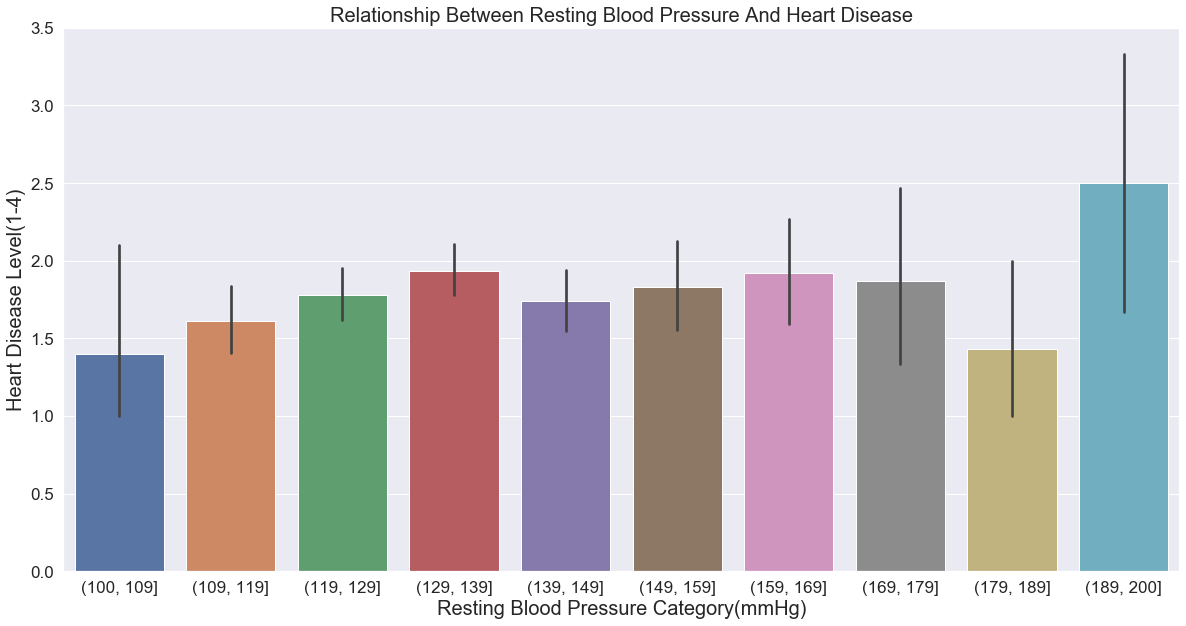

In [35]:
plt.figure(figsize=(20,10))
sns.set(style='darkgrid')
sns.barplot(data=positive_heart, x='resting_bins', y='num')
plt.title('Relationship Between Resting Blood Pressure And Heart Disease', fontsize=20)
plt.xlabel('Resting Blood Pressure Category(mmHg)', fontsize=20)
plt.ylabel('Heart Disease Level(1-4)', fontsize=20)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### Even though most of the people have a Resting Blood Pressure of around 130mmHg, the heart disease level for this category is around 1.8 on a scale of 1-4 and this is not that high. The highest heart disease level is for the 189-200mmHg category and it is 2.5 on a scale of 1-4. This is not that high again, so the resting blood preesure can be excluded from the top factors that cause serious heart conditions. 

### c. In the Univariate Analyis, we saw that the mean of the serum cholesterol is 200mg/dl. Now it's time to see if people with this level of serum cholesterol have levels of heart conditions that are high or not. 

In [36]:
chol_bins = [0, 99, 199, 299, 399, 499, 599, 699]
positive_heart['chol_bins'] = pd.cut(positive_heart['chol'], bins=chol_bins)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


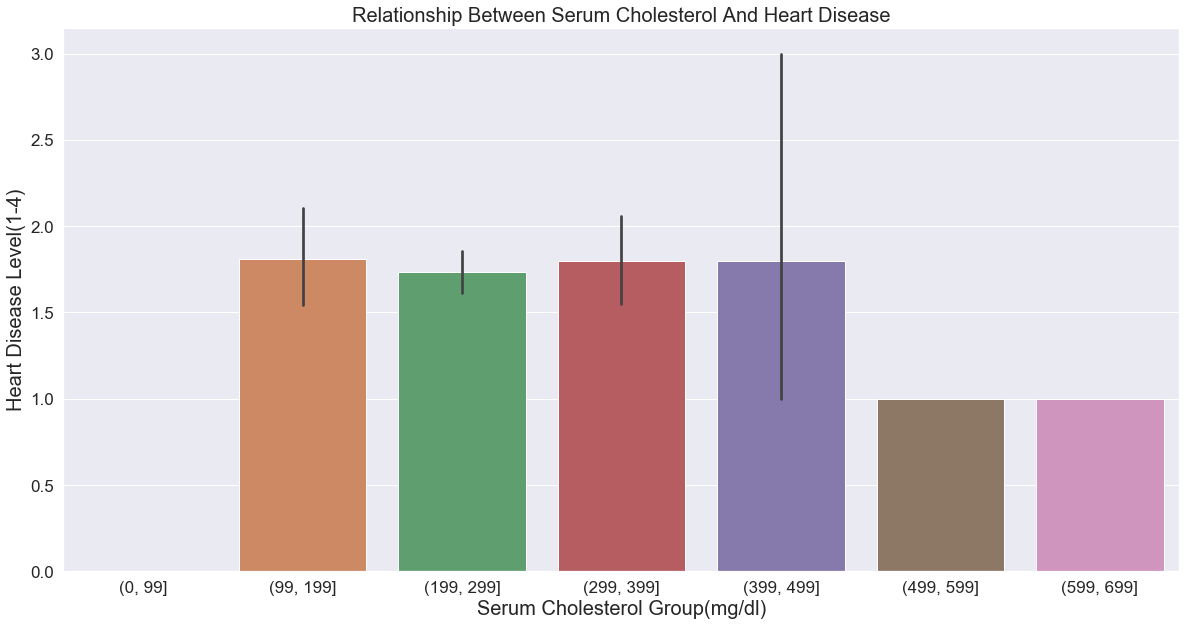

In [37]:
plt.figure(figsize=(20,10))
sns.set(style='darkgrid')
sns.barplot(data=positive_heart, x='chol_bins', y='num')
plt.title('Relationship Between Serum Cholesterol And Heart Disease', fontsize=20)
plt.xlabel('Serum Cholesterol Group(mg/dl)', fontsize=20)
plt.ylabel('Heart Disease Level(1-4)', fontsize=20)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### We can see that people with a serum cholesterol of 200-299mg/dl have a heart condition level of around 1.6 on a scale of 1-4. The highest level is around 1.7 for people with a serum cholesterol between 100-199mg/dl. This will be studied further when other columns are included in the analysis. 

### d. In the uni-variate analysis, the data for the maximum heart rate achieved is normally distributed, and the mean is around 135 beats per minute. Let's see if people that have a heart rate which is around this value have high levels of heart disease or not. 

In [38]:
heart_rate_bins = [50, 75, 100, 125, 150, 175, 200, 225]
positive_heart['heart_rate_bins'] = pd.cut(positive_heart['thalch'], bins=heart_rate_bins)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


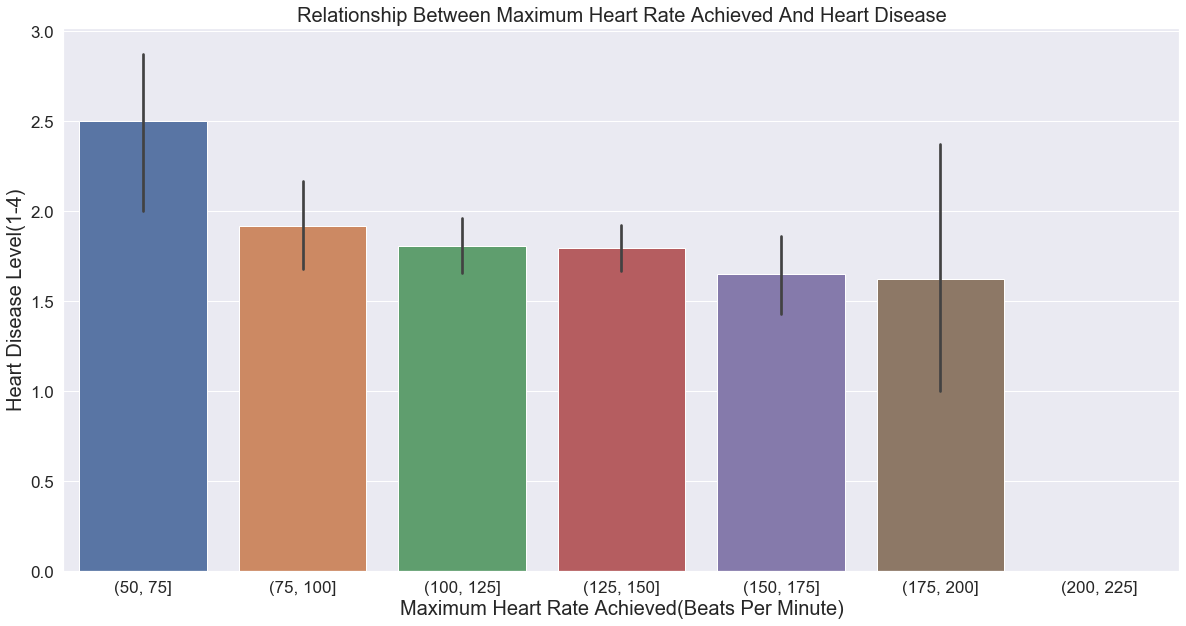

In [39]:
plt.figure(figsize=(20,10))
sns.set(style='darkgrid')
sns.barplot(data=positive_heart, x='heart_rate_bins', y='num')
plt.title('Relationship Between Maximum Heart Rate Achieved And Heart Disease', fontsize=20)
plt.xlabel('Maximum Heart Rate Achieved(Beats Per Minute)', fontsize=20)
plt.ylabel('Heart Disease Level(1-4)', fontsize=20)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### People within the 135 Beats Per Minute Range have a heart disease level of about 1.7. The highest level(2.5) is for the 51-75 range. This will be studied further in the analysis.

### e. For the ST depression, we saw that the data is skewed to the right with the mean having a value of about 1mm. Lets see if people with this level of ST depression have a high level of heart disease or not.

In [40]:
st_depression_bins = [-2,0,2,4,6]
positive_heart['st_depression_bins'] = pd.cut(positive_heart['oldpeak'], bins=st_depression_bins)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


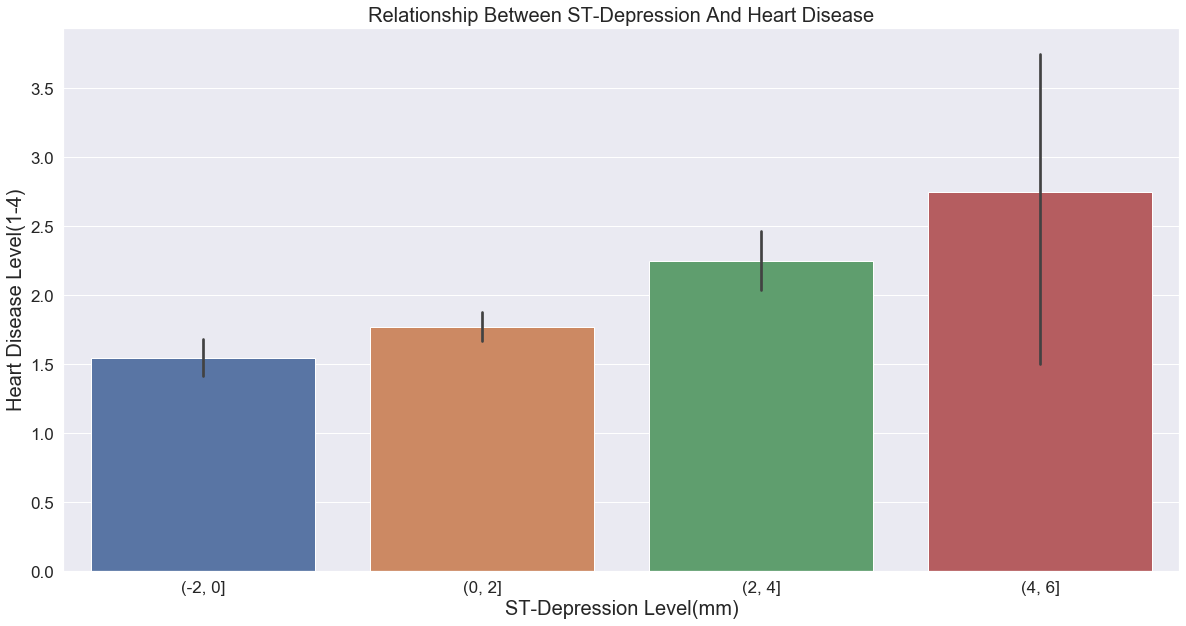

In [41]:
plt.figure(figsize=(20,10))
sns.set(style='darkgrid')
sns.barplot(data=positive_heart, x='st_depression_bins', y='num')
plt.title('Relationship Between ST-Depression And Heart Disease', fontsize=20)
plt.xlabel('ST-Depression Level(mm)', fontsize=20)
plt.ylabel('Heart Disease Level(1-4)', fontsize=20)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### For people with an ST-Depression level that is around 1mm, the heart disease level is around 1.6 which is not that high. The highest is around 2.6, and this is for people with an ST-Depression level between 5 and 6mm.

### f. In the univariate analysis, we saw that there are more males compared to females. Lets see if sex affects the heart disease level. 

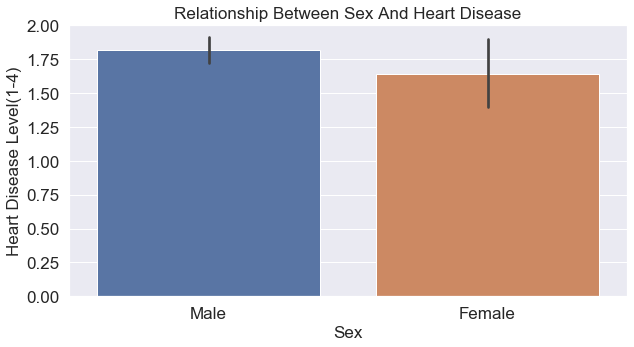

In [42]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.barplot(data=positive_heart, x='sex', y='num')
plt.title('Relationship Between Sex And Heart Disease', fontsize=17)
plt.xlabel('Sex', fontsize=17)
plt.ylabel('Heart Disease Level(1-4)', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### It seems like males are prone to high heart level diseases compared to females.

### g. Assymptomatic Chest pain is the most common. Time to see if certain types of chest pain cause high levels of heart disease. 

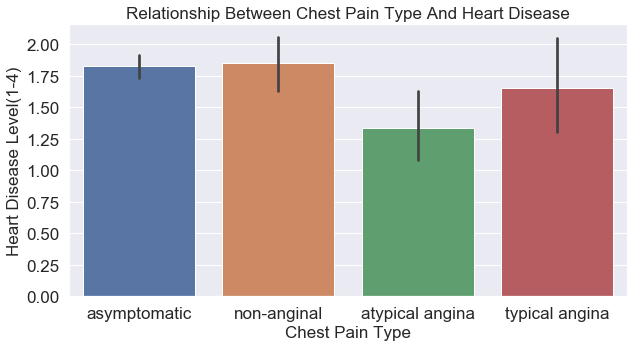

In [43]:

plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.barplot(data=positive_heart, x='cp', y='num')
plt.title('Relationship Between Chest Pain Type And Heart Disease', fontsize=17)
plt.xlabel('Chest Pain Type', fontsize=17)
plt.ylabel('Heart Disease Level(1-4)', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### Asymptomatic chest pains have higher levels of heart disease. Non-anginal can be excluded as it means that there is no chest pain. 

### h. Time to visualize the relationship between electrocardiographic results and Heart Disease Level.

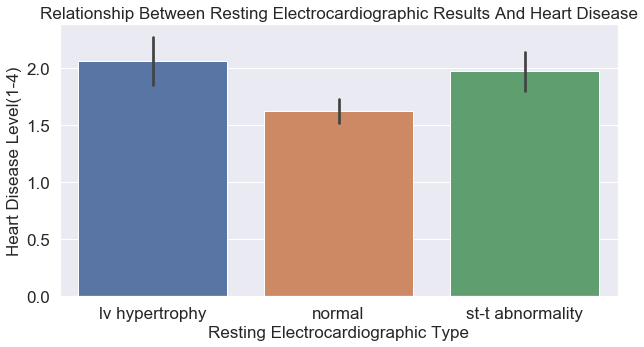

In [44]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.barplot(data=positive_heart, x='restecg', y='num')
plt.title('Relationship Between Resting Electrocardiographic Results And Heart Disease', fontsize=17)
plt.xlabel('Resting Electrocardiographic Type', fontsize=17)
plt.ylabel('Heart Disease Level(1-4)', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### Iv hypertrophy and st-t abnormality have high levels of heart disease. 

## More Analysis

### a. Visualize the relationship among age, sex and heart disease.

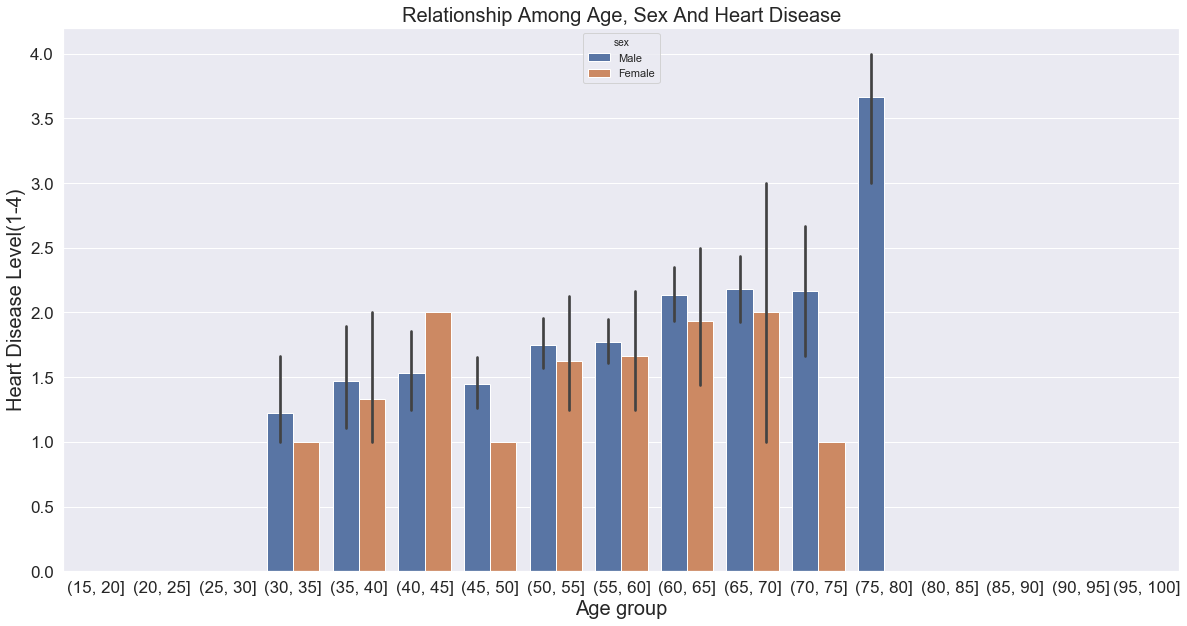

In [45]:
plt.figure(figsize=(20,10))
sns.set(style='darkgrid')
sns.barplot(data=positive_heart, x='age_bins', hue='sex', y='num')
plt.title('Relationship Among Age, Sex And Heart Disease', fontsize=20)
plt.xlabel('Age group', fontsize=20)
plt.ylabel('Heart Disease Level(1-4)', fontsize=20)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### Males in the age group 75-80 have a really high disease level.

### b. Visualize the relationship among sex, Chest Pain and heart disease.

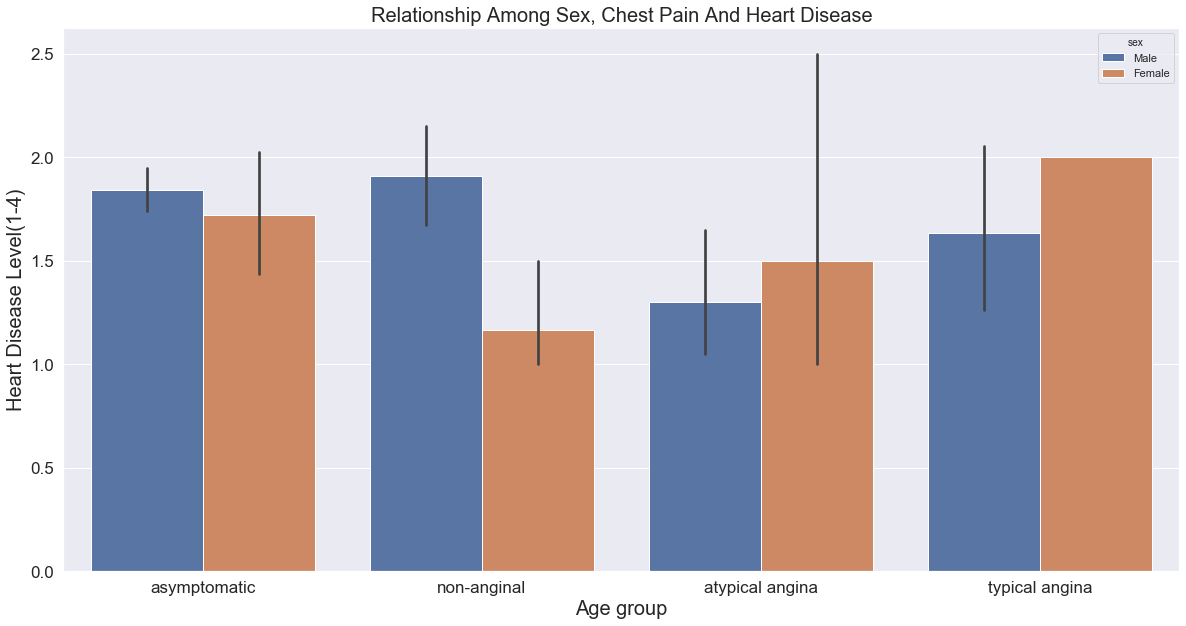

In [46]:
plt.figure(figsize=(20,10))
sns.set(style='darkgrid')
sns.barplot(data=positive_heart, x='cp', hue='sex', y='num')
plt.title('Relationship Among Sex, Chest Pain And Heart Disease', fontsize=20)
plt.xlabel('Age group', fontsize=20)
plt.ylabel('Heart Disease Level(1-4)', fontsize=20)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### It seems like for males, asymptomatic chest pain causes a high heart disease level, while for females it is typical angina. Non-anginal is not included as it means that it is not a heart disease. 

### c. Visualize the relationship among chest pain, age and Heart Disease

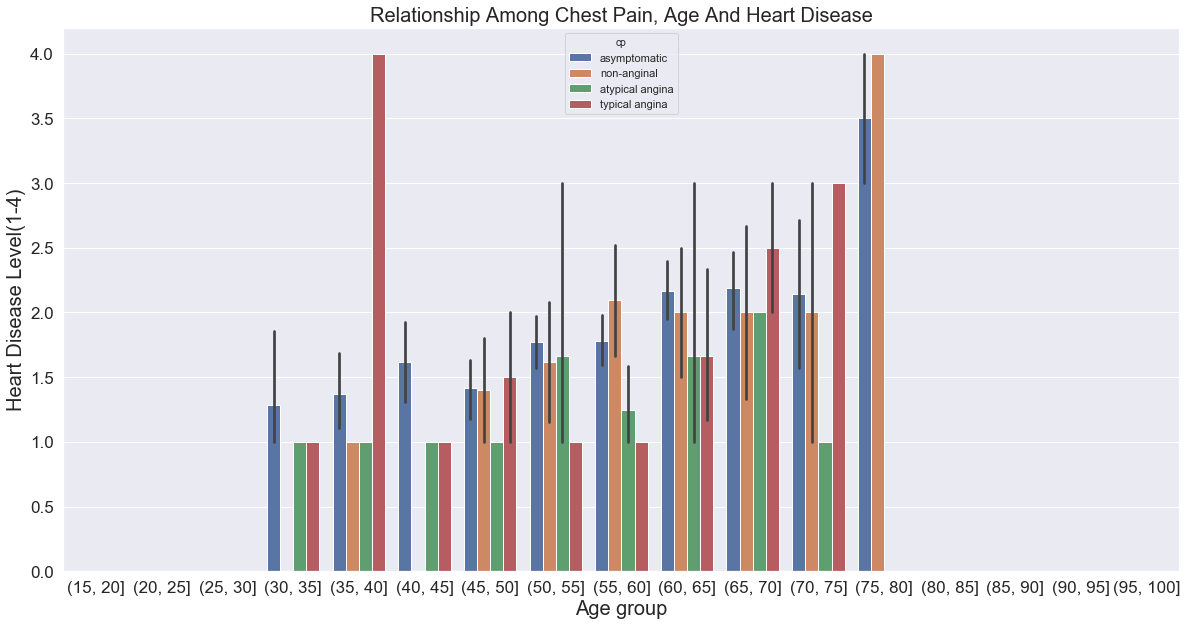

In [47]:
plt.figure(figsize=(20,10))
sns.set(style='darkgrid')
sns.barplot(data=positive_heart, x='age_bins', hue='cp', y='num')
plt.title('Relationship Among Chest Pain, Age And Heart Disease', fontsize=20)
plt.xlabel('Age group', fontsize=20)
plt.ylabel('Heart Disease Level(1-4)', fontsize=20)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### Assymptomatic angina and typical angina seem to be the most common in most age groups. Assymptomatic angina dominates in most of them, while for the age groups of 35-40, 45-50, 65-70 and 70-75, Typical angina dominates. Non-anginal can be excluded as it means that there is no chest pain. 

### d. Figure out the relationship among Resting Blood Pressure, sex and Heart Disease

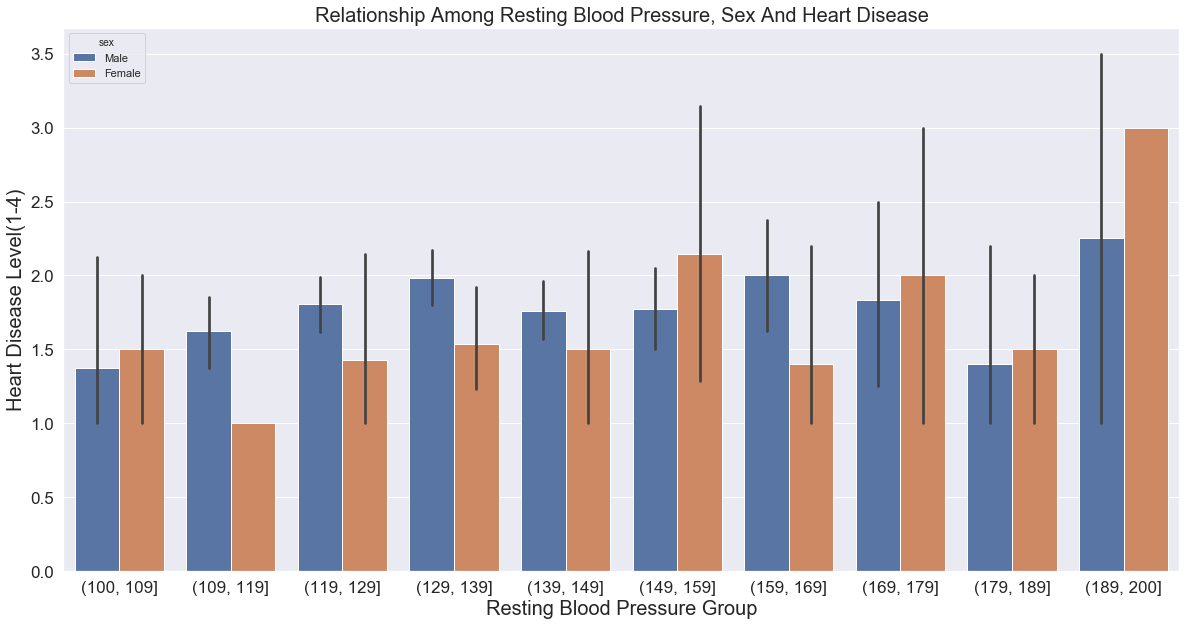

In [48]:
plt.figure(figsize=(20,10))
sns.set(style='darkgrid')
sns.barplot(data=positive_heart, x='resting_bins', hue='sex', y='num')
plt.title('Relationship Among Resting Blood Pressure, Sex And Heart Disease', fontsize=20)
plt.xlabel('Resting Blood Pressure Group', fontsize=20)
plt.ylabel('Heart Disease Level(1-4)', fontsize=20)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### Both males and females seem to have high heart disease levels for a resting blood pressure that is in the range 189-200mmHg

### e. Figure out the relationship among serum cholesterol, sex and Heart Disease

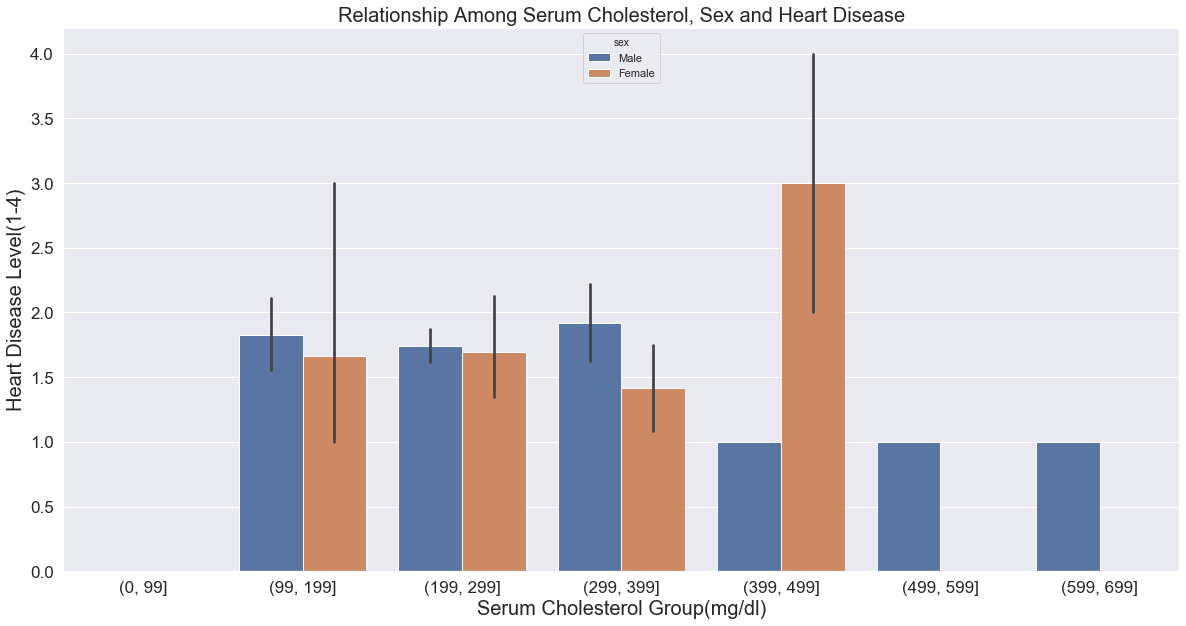

In [49]:
plt.figure(figsize=(20,10))
sns.set(style='darkgrid')
sns.barplot(data=positive_heart, x='chol_bins', hue='sex', y='num')
plt.title('Relationship Among Serum Cholesterol, Sex and Heart Disease', fontsize=20)
plt.xlabel('Serum Cholesterol Group(mg/dl)', fontsize=20)
plt.ylabel('Heart Disease Level(1-4)', fontsize=20)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### For males, a serum cholesterol of 300-399mg/dl leads to a high heart disease level, while for females, a Serum Cholesterol of 400-499mg/dl leads to a high heart disease level. 

### f. Figure out the relationship between Fasting blood sugar and heart disease

In [50]:
fast_blood_chest_pain = positive_heart.groupby(['fbs', 'num']).count()
fast_blood_chest_pain.drop(columns= fast_blood_chest_pain.iloc[:, 1:], inplace=True)
fast_blood_chest_pain.rename(columns={'id':'total'}, inplace=True)
fast_blood_chest_pain.reset_index(inplace=True)

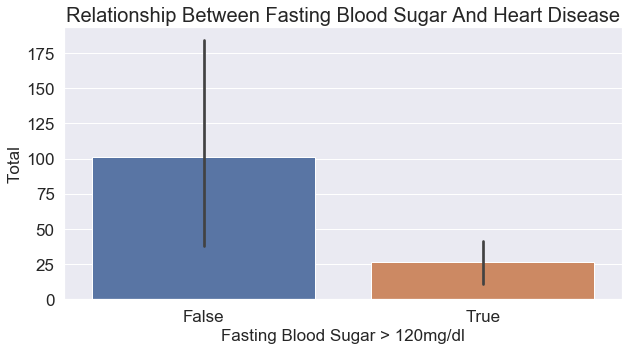

In [51]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.barplot(data=fast_blood_chest_pain, x='fbs', y='total')
plt.title('Relationship Between Fasting Blood Sugar And Heart Disease', fontsize=20)
plt.xlabel('Fasting Blood Sugar > 120mg/dl', fontsize=17)
plt.ylabel('Total', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### Seems like a fasting blood sugar > 120mg/dl does not lead to a high heart disease level.

### g. Figure Out The Relationship Among Resting Electrocardiographic Results, sex and heart disease level

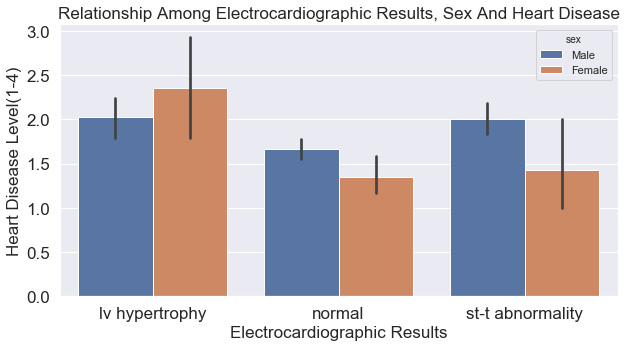

In [52]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.barplot(data=positive_heart, x='restecg', y='num', hue='sex')
plt.title('Relationship Among Electrocardiographic Results, Sex And Heart Disease', fontsize=17)
plt.xlabel('Electrocardiographic Results', fontsize=17)
plt.ylabel('Heart Disease Level(1-4)', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### Both male and females have a high heart disease level if they have Iv hypertrophy.

### h. Figure out the relationship among maximum heart rate achieved, sex and heart disease.

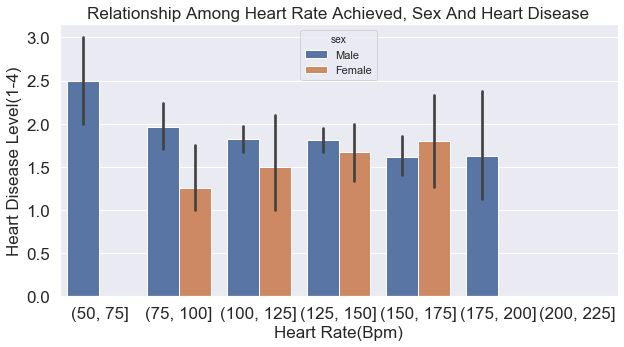

In [53]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.barplot(data=positive_heart, x='heart_rate_bins', y='num', hue='sex')
plt.title('Relationship Among Heart Rate Achieved, Sex And Heart Disease', fontsize=17)
plt.xlabel('Heart Rate(Bpm)', fontsize=17)
plt.ylabel('Heart Disease Level(1-4)', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### Seems like most males with a heart rate that is in the range (50-75) Beats Per Minute have a high heart disease level. For females, those with a heart rate between 150-175 Beats Per Minute have a high heart disease level. 

### i. Find the relationship among the number of vessels colored by flouroscopy, sex and heart disease. 

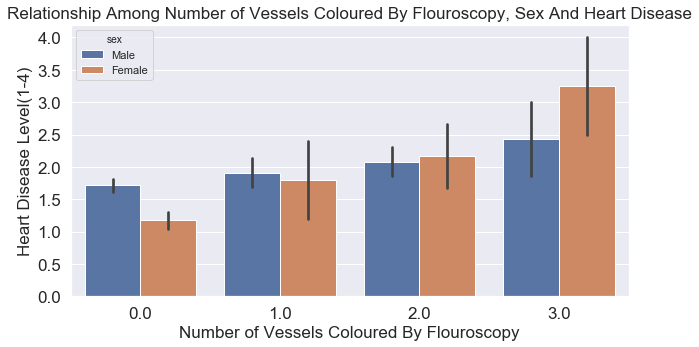

In [57]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sns.barplot(data=positive_heart, x='ca', y='num', hue='sex')
plt.title('Relationship Among Number of Vessels Coloured By Flouroscopy, Sex And Heart Disease', fontsize=17)
plt.xlabel('Number of Vessels Coloured By Flouroscopy', fontsize=17)
plt.ylabel('Heart Disease Level(1-4)', fontsize=17)
plt.xticks(size=17)
plt.yticks(size=17) 
plt.show()

### Seems like both males and females with 3 vessels coloured by flouroscopy have a high heart disease level.